Q. 5: I have ploted all 3 in the same plot with step size 0.1 with exact answer. And table is also provided in answer.

      x   Exact y   Euler y  Euler Error (%)     RK2 y  RK2 Error (%)  \
0   0.0  1.000000  1.000000         0.000000  1.000000       0.000000   
1   0.1  1.188119  1.200000         1.000000  1.188529       0.034497   
2   0.2  1.346154  1.374257         2.087694  1.346697       0.040331   
3   0.3  1.467890  1.513709         3.121430  1.468252       0.024663   
4   0.4  1.551724  1.613872         4.005076  1.551663       0.003930   
5   0.5  1.600000  1.674984         4.686510  1.599403       0.037311   
6   0.6  1.617647  1.700985         5.151826  1.616526       0.069284   
7   0.7  1.610738  1.697957         5.414849  1.609190       0.096126   
8   0.8  1.585366  1.672646         5.505355  1.583522       0.116287   
9   0.9  1.546961  1.631412         5.459141  1.544955       0.129726   
10  1.0  1.500000  1.579669         5.311299  1.497941       0.137246   

       RK4 y  RK4 Error (%)  
0   1.000000       0.000000  
1   1.188119       0.000004  
2   1.346154       0.000018  
3  

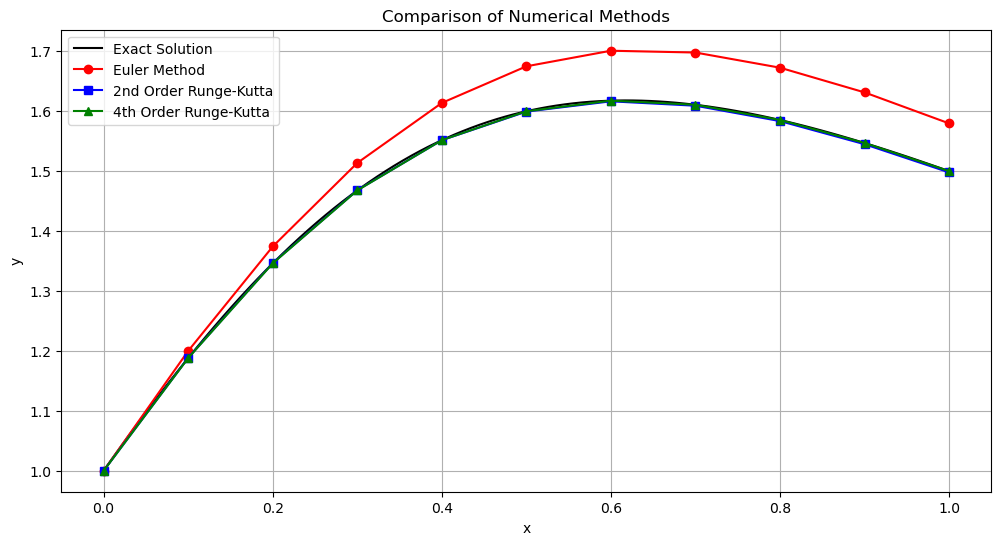

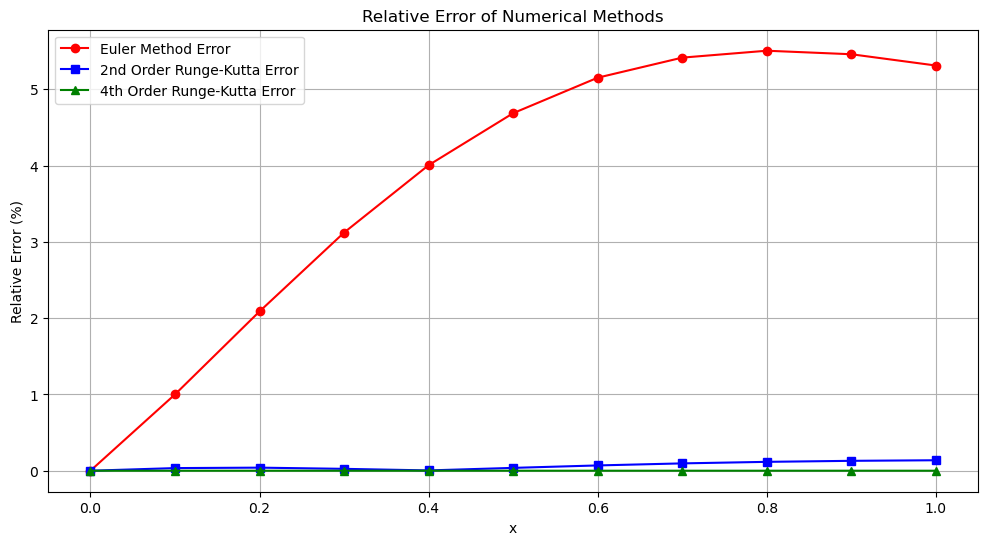

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the differential equation
def f(x, y):
    return (2 - 2 * x * y) / (x**2 + 1)

# Exact solution
def exact_solution(x):
    return (2*x + 1) / (x**2 + 1)

# Euler's method
def euler_method(f, x0, y0, h, steps):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(steps):
        y += h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

# 2nd order Runge-Kutta method
def rk2_method(f, x0, y0, h, steps):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(steps):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        y += k2
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

# 4th order Runge-Kutta method
def rk4_method(f, x0, y0, h, steps):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(steps):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

# Parameters
x0 = 0
y0 = 1
h = 0.1
steps = 10

# Numerical solutions
x_euler, y_euler = euler_method(f, x0, y0, h, steps)
x_rk2, y_rk2 = rk2_method(f, x0, y0, h, steps)
x_rk4, y_rk4 = rk4_method(f, x0, y0, h, steps)

# Exact solution values at computed points
y_exact_euler = exact_solution(np.array(x_euler))
y_exact_rk2 = exact_solution(np.array(x_rk2))
y_exact_rk4 = exact_solution(np.array(x_rk4))

# Relative error calculation
def relative_error(y_approx, y_exact):
    return 100 * np.abs((y_approx - y_exact) / y_exact)

# Relative errors
error_euler = relative_error(np.array(y_euler), y_exact_euler)
error_rk2 = relative_error(np.array(y_rk2), y_exact_rk2)
error_rk4 = relative_error(np.array(y_rk4), y_exact_rk4)

# Create a DataFrame for the errors
data = {
    'x': x_euler,
    'Exact y': y_exact_euler,
    'Euler y': y_euler,
    'Euler Error (%)': error_euler,
    'RK2 y': y_rk2,
    'RK2 Error (%)': error_rk2,
    'RK4 y': y_rk4,
    'RK4 Error (%)': error_rk4
}
df = pd.DataFrame(data)

# Print the DataFrame as a table
print(df)

# Plotting numerical solutions and exact solution
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, 1, 100), exact_solution(np.linspace(0, 1, 100)), label='Exact Solution', color='black')
plt.plot(x_euler, y_euler, 'o-', label='Euler Method', color='red')
plt.plot(x_rk2, y_rk2, 's-', label='2nd Order Runge-Kutta', color='blue')
plt.plot(x_rk4, y_rk4, '^-', label='4th Order Runge-Kutta', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Numerical Methods')
plt.legend()
plt.grid(True)
plt.show()

# Plotting relative errors
plt.figure(figsize=(12, 6))
plt.plot(x_euler, error_euler, 'o-', label='Euler Method Error', color='red')
plt.plot(x_rk2, error_rk2, 's-', label='2nd Order Runge-Kutta Error', color='blue')
plt.plot(x_rk4, error_rk4, '^-', label='4th Order Runge-Kutta Error', color='green')
plt.xlabel('x')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error of Numerical Methods')
plt.legend()
plt.grid(True)
plt.show()


